In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "Resources/Mouse_Drug_Data.csv"
clinical_trial_data_to_load = "Resources/Clinical_Trial_Data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MouseData = pd.read_csv(mouse_drug_data_to_load)
TrialData = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
CompleteData = pd.merge(TrialData,MouseData,on="Mouse ID")

# Display the data table for preview
CompleteData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Group1=CompleteData.groupby(["Drug","Timepoint"])
Group1["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
TumorResponse=pd.DataFrame(Group1["Tumor Volume (mm3)"].mean())
# Preview DataFrame
TumorResponse.reset_index(level=[0,1], inplace=True)
TumorResponse.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Group2=CompleteData.groupby(["Drug","Timepoint"])
Group2["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
SEMTumorResponse=pd.DataFrame(Group2["Tumor Volume (mm3)"].sem())

# Preview DataFrame
SEMTumorResponse.reset_index(level=[0,1], inplace=True)
SEMTumorResponse.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
ResponseReformat=TumorResponse.reset_index()
ResponseReformat=ResponseReformat.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

SEMTumorResponse=pd.DataFrame(Group1["Tumor Volume (mm3)"].sem()).reset_index()
SEMTumorResponse = SEMTumorResponse.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
SEMTumorResponse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [5]:
ResponseReformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


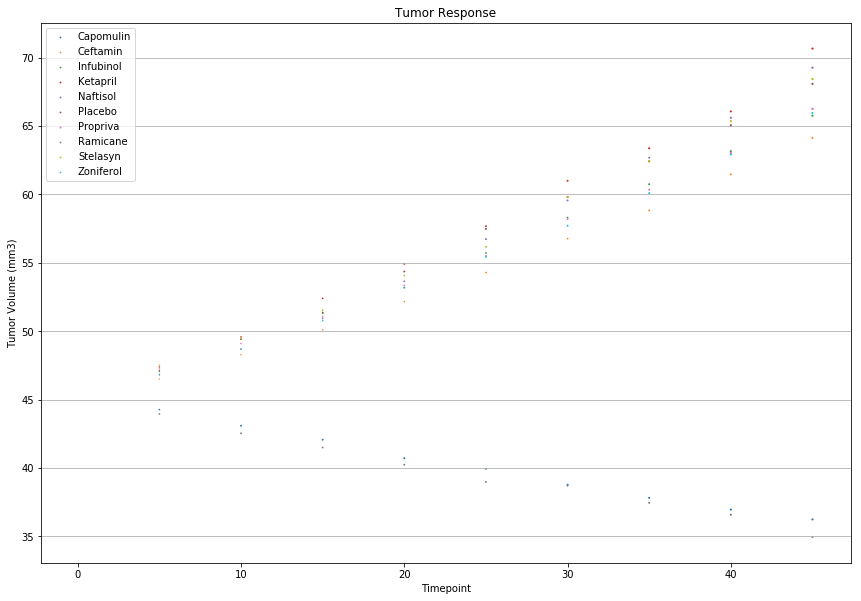

In [6]:
# The instructions in the  README.md says that we have to do this with scatter, but the visualization is so much better with Error Bars
plt.scatter(ResponseReformat.index, ResponseReformat["Capomulin"], SEMTumorResponse["Capomulin"])
plt.scatter(ResponseReformat.index, ResponseReformat["Ceftamin"], SEMTumorResponse["Ceftamin"])
plt.scatter(ResponseReformat.index, ResponseReformat["Infubinol"], SEMTumorResponse["Infubinol"])
plt.scatter(ResponseReformat.index, ResponseReformat["Ketapril"], SEMTumorResponse["Ketapril"])
plt.scatter(ResponseReformat.index, ResponseReformat["Naftisol"], SEMTumorResponse["Naftisol"])
plt.scatter(ResponseReformat.index, ResponseReformat["Placebo"], SEMTumorResponse["Placebo"])
plt.scatter(ResponseReformat.index, ResponseReformat["Propriva"], SEMTumorResponse["Propriva"])
plt.scatter(ResponseReformat.index, ResponseReformat["Ramicane"], SEMTumorResponse["Ramicane"])
plt.scatter(ResponseReformat.index, ResponseReformat["Stelasyn"], SEMTumorResponse["Stelasyn"])
plt.scatter(ResponseReformat.index, ResponseReformat["Zoniferol"], SEMTumorResponse["Zoniferol"])

plt.title("Tumor Response")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(axis="y")
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],loc="best")
plt.subplots_adjust(top=2)
plt.subplots_adjust(right=2)

# Save the Figure
plt.savefig("Output/Scatter_Plot.png")

# Show the Figure
plt.show()

## The instructions in the  README.md says that we have to do this with scatter, but the visualization is so much better with Error Bars

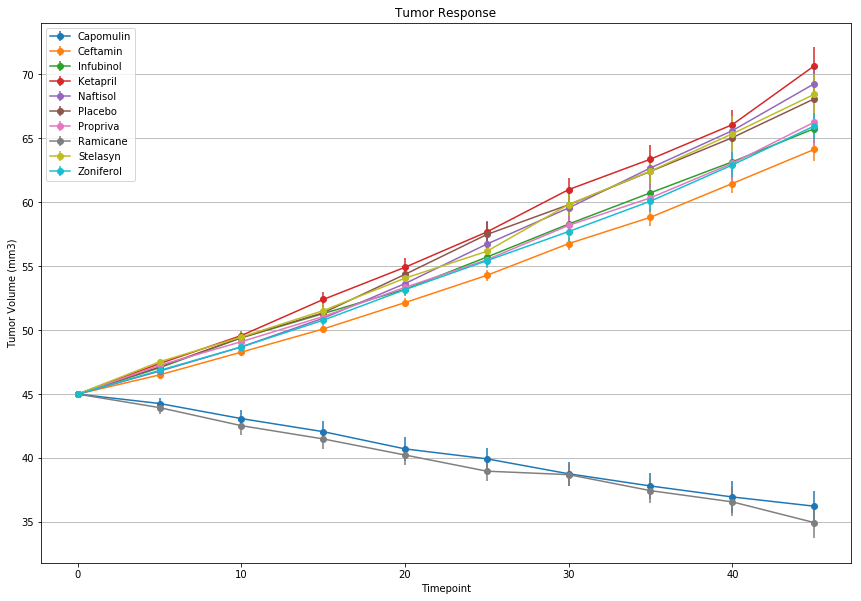

In [7]:
# Generate the Plot (with Error Bars)

plt.errorbar(ResponseReformat.index, ResponseReformat["Capomulin"], yerr=SEMTumorResponse["Capomulin"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Ceftamin"], yerr=SEMTumorResponse["Ceftamin"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Infubinol"], yerr=SEMTumorResponse["Infubinol"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Ketapril"], yerr=SEMTumorResponse["Ketapril"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Naftisol"], yerr=SEMTumorResponse["Naftisol"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Placebo"], yerr=SEMTumorResponse["Placebo"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Propriva"], yerr=SEMTumorResponse["Propriva"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Ramicane"], yerr=SEMTumorResponse["Ramicane"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Stelasyn"], yerr=SEMTumorResponse["Stelasyn"], marker="o")
plt.errorbar(ResponseReformat.index, ResponseReformat["Zoniferol"], yerr=SEMTumorResponse["Zoniferol"], marker="o")

plt.title("Tumor Response")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(axis="y")
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],loc="best")
plt.subplots_adjust(top=2)
plt.subplots_adjust(right=2)

# Save the Figure
plt.savefig("Output/Error_Plot.png")

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MeanMet = CompleteData.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
MeanMet = pd.DataFrame(MeanMet)
# Preview DataFrame
MeanMet.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MeanMetSEM = CompleteData.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
MeanMetSEM = pd.DataFrame(MeanMetSEM)

# Preview DataFrame
MeanMetSEM.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
MeanMetReformat=MeanMet.reset_index()
MeanMetReformat=MeanMetReformat.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

ReformatMeanMetSEM=MeanMetSEM.reset_index()
ReformatMeanMetSEM = ReformatMeanMetSEM.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
ReformatMeanMetSEM.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [11]:
MeanMetReformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


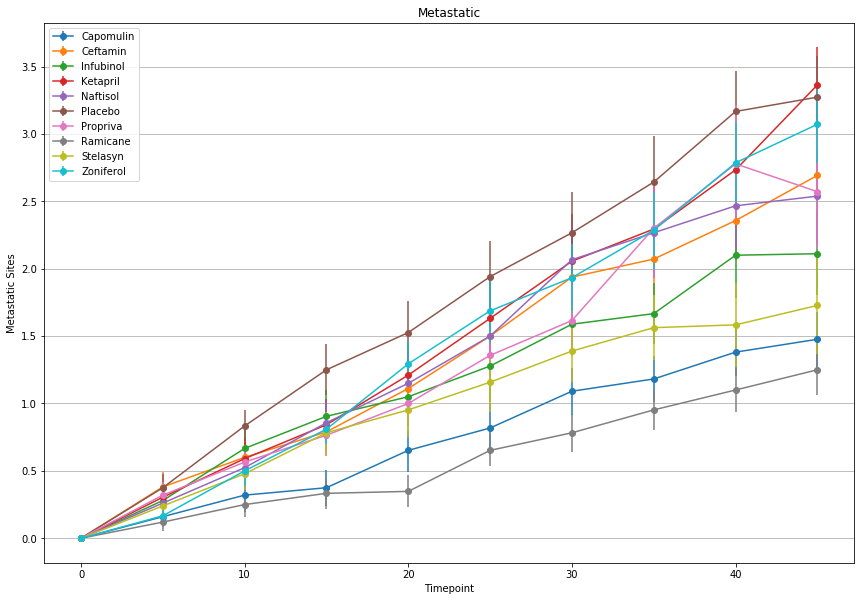

In [12]:
# Generate the Plot (with Error Bars)

plt.errorbar(MeanMetReformat.index, MeanMetReformat["Capomulin"], yerr=ReformatMeanMetSEM["Capomulin"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Ceftamin"], yerr=ReformatMeanMetSEM["Ceftamin"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Infubinol"], yerr=ReformatMeanMetSEM["Infubinol"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Ketapril"], yerr=ReformatMeanMetSEM["Ketapril"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Naftisol"], yerr=ReformatMeanMetSEM["Naftisol"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Placebo"], yerr=ReformatMeanMetSEM["Placebo"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Propriva"], yerr=ReformatMeanMetSEM["Propriva"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Ramicane"], yerr=ReformatMeanMetSEM["Ramicane"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Stelasyn"], yerr=ReformatMeanMetSEM["Stelasyn"], marker="o")
plt.errorbar(MeanMetReformat.index, MeanMetReformat["Zoniferol"], yerr=ReformatMeanMetSEM["Zoniferol"], marker="o")

plt.title("Metastatic")
plt.ylabel("Metastatic Sites")
plt.xlabel("Timepoint")
plt.grid(axis="y")
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],loc="best")
plt.subplots_adjust(top=2)
plt.subplots_adjust(right=2)

# Save the Figure
plt.savefig("Output/Met_Plot.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = CompleteData.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival = pd.DataFrame({"Survival Count": survival})

# Preview DataFrame
survival.head().reset_index()

,Drug,Timepoint,Survival Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival= survival.reset_index()
survivalReformat = survival.pivot(index="Timepoint", columns="Drug")["Survival Count"]

# Preview the Data Frame
survivalReformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


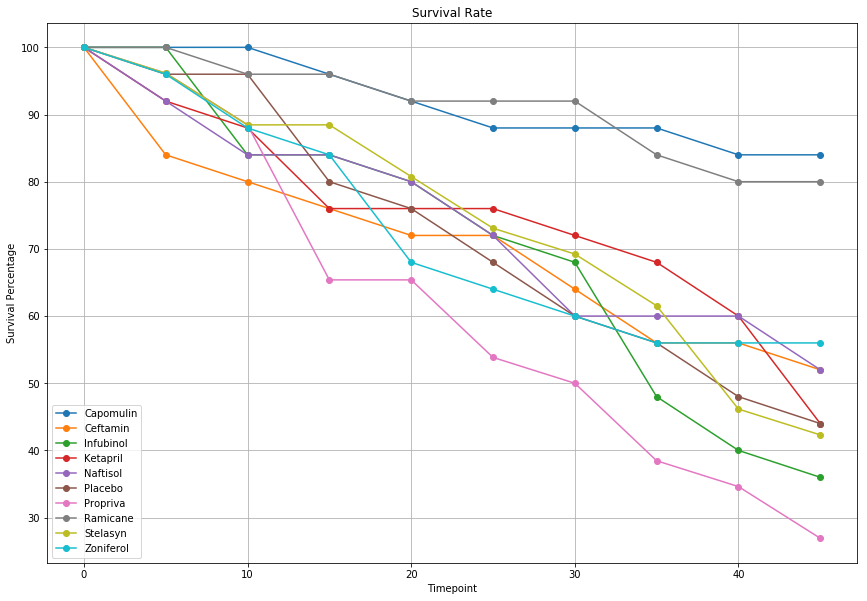

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survivalReformat["Capomulin"] / 25, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Ceftamin"] / 25, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Infubinol"] / 25, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Ketapril"] / 25, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Naftisol"] / 25, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Placebo"] / 25 , "o", linestyle="solid")
plt.plot(100 * survivalReformat["Propriva"] / 26, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Ramicane"] / 25, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Stelasyn"] / 26, "o", linestyle="solid")
plt.plot(100 * survivalReformat["Zoniferol"] / 25, "o", linestyle="solid")

plt.title("Survival Rate")
plt.ylabel("Survival Percentage")
plt.xlabel("Timepoint")
plt.grid(True)
plt.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],loc="best")
plt.subplots_adjust(top=2)
plt.subplots_adjust(right=2)
# Save the Figure
plt.savefig("Output/Survival.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
 # Calculate the percent changes for each drug
Change =  100 * (ResponseReformat.iloc[-1] - ResponseReformat.iloc[0]) / ResponseReformat.iloc[0]
ChangeSE =  100 * (SEMTumorResponse.iloc[-1] - SEMTumorResponse.iloc[0]) / SEMTumorResponse.iloc[0]

# Display the data to confirm
Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

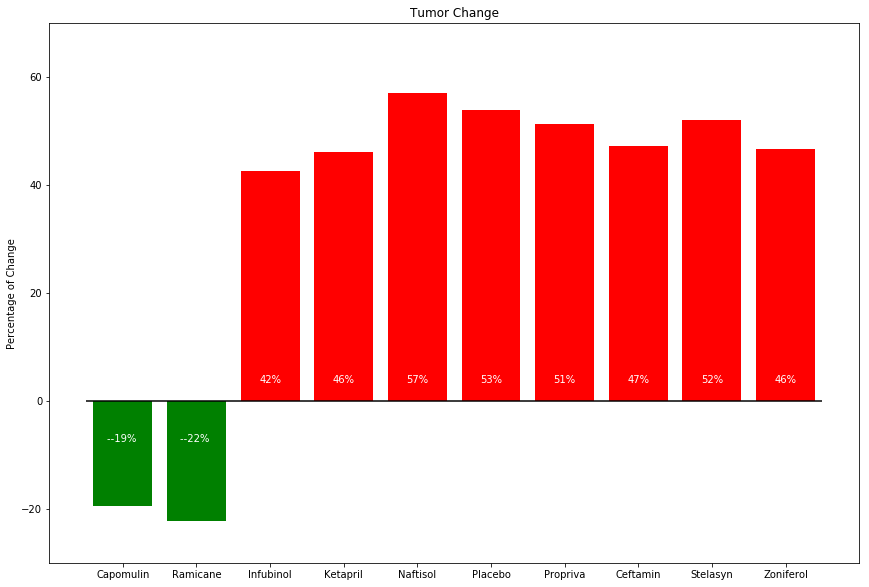

In [17]:
# Store all Relevant Percent Changes into a Tuple

pct_changes = (Change["Capomulin"],
               Change["Ramicane"],
               Change["Ceftamin"],
               Change["Infubinol"], 
               Change["Ketapril"],
               Change["Naftisol"],
               Change["Placebo"],
               Change["Propriva"],
               Change["Stelasyn"],
               Change["Zoniferol"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(Change))  
width = 0.8
rectsPass = ax.bar(ind[:2], pct_changes[:2], width, color='green')
rectsFail = ax.bar(ind[2:], pct_changes[2:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("Percentage of Change")
ax.set_title("Tumor Change")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin", "Ramicane", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ceftamin","Stelasyn","Zoniferol"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(False)
plt.subplots_adjust(top=2)
plt.subplots_adjust(right=2)
plt.hlines(0,-0.5,9.5)




# Use functions to label the percentages of changes

def Pass(results):
    for x in results:
        height = x.get_height()
        ax.text(x.get_x() + x.get_width()/2., -8,"-%d%% " % int(height),ha="center", va="bottom", color="white")

def Fail(results):
    for x in results:
        height = x.get_height()
        ax.text(x.get_x() + x.get_width()/2., 3,"%d%%" % int(height),ha="center", va="bottom", color="white")



# Call functions to implement the function calls
Pass(rectsPass)
Fail(rectsFail)

# Save the Figure
fig.savefig("Output/Pass.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

# Conclusion

<ul>
    <li>The only drugs to be actually doing something against the tumors are Capomulin and Ramicane, the results of the rest are  not very different from the placebo.</li>
    <li>The Ramicane seems to be a little more aggresive than the Capomulin, it will be worth to make more tests of this two, but with the actual information of the survival rate it looks that the Capomulin is a safer option</li>
    <li>Although the Naftisol had the worst response against the tumor growth the survival rate was a above than most of the other less efective drugs, and in the case of the propriva it had the worst results in survival rate, even worse than the placebo, so maybe the drug actually helped to kill the mice instead of fighting the tumors</li>
</ul>